# Importar librerias

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos

In [258]:
pd.set_option('display.max_rows', None)
df = pd.read_csv("data/data-covid-sin-outliers.csv")

C:\Users\NEIRA\AppData\Local\Temp\ipykernel_3656\3024524526.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/data-covid-sin-outliers.csv")


In [259]:
# Obtener información básica del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92817 entries, 0 to 92816
Data columns (total 99 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       92817 non-null  int64  
 1   ano                      92817 non-null  int64  
 2   semana                   92817 non-null  int64  
 3   fecha_not                92817 non-null  object 
 4   diresa                   92817 non-null  object 
 5   red                      92817 non-null  object 
 6   microred                 92817 non-null  object 
 7   establecimiento          92817 non-null  object 
 8   institucion              92817 non-null  object 
 9   clasificacion            92817 non-null  object 
 10  fecha_det                92817 non-null  object 
 11  nombre                   92817 non-null  object 
 12  edad                     92817 non-null  int64  
 13  tipo_edad                92817 non-null  object 
 14  sexo                  

In [260]:
# Definir los tipos de datos por grupo
tipo_datos = {
    'int': ['id', 'ano', 'semana', 'edad', 'trimestre', 'total_sintomas', 'total_contactos'],
    
    'float': ['temperatura'],
    
    'bool': ['fiebre', 'malestar', 'tos', 'garganta', 'congestion', 'respiratoria', 'diarrea', 'nauseas', 'cefalea', 'irritabilidad', 'muscular', 'abdominal', 'pecho', 'articulaciones', 'exudado', 'conjuntival', 'convulsion', 'coma', 'disnea', 'auscultacion', 'rxpulmonar', 'embarazo', 'cardiovascular', 'diabetes', 'hepatica', 'neurologica', 'inmunodeficiencia', 'renal', 'hepatico', 'pulmonar', 'cancer', 'contacto_salud', 'contacto_familiar', 'contacto_trabajo', 'contacto_desconocido', 'entorno_salud', 'entorno_familiar', 'entorno_trabajo', 'entorno_desconocido', 'tiene_sintomas', 'contacto_viaje', 'sintoma_grave'],
    
    'str': ['diresa', 'red', 'microred', 'establecimiento', 'institucion', 'clasificacion', 'nombre', 'tipo_edad', 'sexo', 'tipodoc', 'pais_residencia', 'departamento_residencia', 'provincia_residencia', 'residencia', 'ubigeo', 'etnia', 'direccion', 'hospitalizado', 'aislamiento', 'postparto', 'ocupacion', 'otra_ocupacion', 'viajado_14', 'pais_1', 'pais_2', 'pais_3', 'eess_14', 'contacto_14', 'confirmado_14', 'contacto_pais', 'mercado', 'mercado_pais', 'muestra_rap', 'prueba_rap', 'resultado_rap', 'grupo_etario', 'fecha_not', 'fecha_det', 'fecha_ini', 'fecha_hos', 'fecha_ais', 'fecha_def', 'fecha_mue', 'fecha_res', 'fecha_mue1', 'fecha_res1', 'fecha_rap', 'fecha_res_rap', 'fecha_rap1']
    
    #'date': ['fecha_not', 'fecha_det', 'fecha_ini', 'fecha_hos', 'fecha_ais', 'fecha_def', 'fecha_mue', 'fecha_res', 'fecha_mue1', 'fecha_res1', 'fecha_rap', 'fecha_res_rap', 'fecha_rap1']
}

In [261]:
# Convertir cada columna a su tipo de dato correspondiente
for tipo, columnas in tipo_datos.items():
    for col in columnas:
        df[col] = df[col].astype(tipo)

In [262]:
df.head()

,id,ano,semana,fecha_not,diresa,red,microred,establecimiento,institucion,clasificacion,...,prueba_rap,resultado_rap,fecha_res_rap,fecha_rap1,grupo_etario,total_sintomas,tiene_sintomas,total_contactos,contacto_viaje,sintoma_grave
0,542,2021,5,09-02-2021,PUNO,PUNO,SIN MICRORED,"HOSP. REG. ""MANUEL NUÑEZ BUTRÓN"" - PUNO",GOBIERNO REGIONAL,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Adultez,2,True,0,False,False
1,1234,2020,10,07-03-2020,PUNO,SAN ROMAN,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Adultez,7,True,0,True,False
2,1258,2020,10,09-03-2020,PUNO,PUNO,SIN MICRORED,HOSPITAL III DE ESSALUD,ESSALUD,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Adultez,2,True,0,False,False
3,1266,2020,10,09-03-2020,PUNO,SAN ROMAN,SIN MICRORED,"HOSP. ""CARLOS MONGE MEDRANO"" - JULIACA",GOBIERNO REGIONAL,DESCARTADO,...,DESCONOCIDO,DESCONOCIDO,00-00-0000,00-00-0000,Vejez,5,True,0,False,False
4,1292,2021,9,05-03-2021,PUNO,PUNO,METROPOLITANO,C.S. METROPOLITANO PUNO,GOBIERNO REGIONAL,CONFIRMADO,...,SEROLOGIA,NEGATIVO,16-07-2020,00-00-0000,Adultez,4,True,0,False,False


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92817 entries, 0 to 92816
Data columns (total 99 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       92817 non-null  int32  
 1   ano                      92817 non-null  int32  
 2   semana                   92817 non-null  int32  
 3   fecha_not                92817 non-null  object 
 4   diresa                   92817 non-null  object 
 5   red                      92817 non-null  object 
 6   microred                 92817 non-null  object 
 7   establecimiento          92817 non-null  object 
 8   institucion              92817 non-null  object 
 9   clasificacion            92817 non-null  object 
 10  fecha_det                92817 non-null  object 
 11  nombre                   92817 non-null  object 
 12  edad                     92817 non-null  int32  
 13  tipo_edad                92817 non-null  object 
 14  sexo                  

# Análisis de datos 

## Análisis 1: Distribución Demográfica y Síntomas

In [264]:
# Definir el ancho de los bins y el rango de los bins
bin_width = 5
bin_range = [0, 110]

# Calcular los bordes de los bins
bin_edges = np.arange(bin_range[0], bin_range[1] + bin_width, bin_width)

# Crear una columna en el DataFrame que contenga el rango de cada bin
df['rango_edad'] = pd.cut(df['edad'], bins=bin_edges, right=False)

# Calcular la tabla de frecuencias cruzadas
tabla_frecuencias = pd.crosstab(df['rango_edad'], df['sexo'], normalize='index')

# Calcular las frecuencias absolutas de cada género
frecuencias_absolutas = pd.crosstab(df['rango_edad'], df['sexo'])

# Concatenar las frecuencias absolutas a la tabla de frecuencias cruzadas
tabla_frecuencias = pd.concat([tabla_frecuencias, frecuencias_absolutas], axis=1)

# Renombrar las columnas
tabla_frecuencias.columns = ['Femenino (%)', 'Masculino (%)', 'Femenino (Abs)', 'Masculino (Abs)']

# Mostrar la tabla de frecuencias cruzadas
tabla_frecuencias

,Femenino (%),Masculino (%),Femenino (Abs),Masculino (Abs)
rango_edad,,,,
"[0, 5)",0.458027,0.541973,622,736
"[5, 10)",0.476661,0.523339,531,583
"[10, 15)",0.522327,0.477673,772,706
"[15, 20)",0.567768,0.432232,1994,1518
"[20, 25)",0.545514,0.454486,4195,3495
"[25, 30)",0.543534,0.456466,5943,4991
"[30, 35)",0.546617,0.453383,5986,4965
"[35, 40)",0.526132,0.473868,5285,4760
"[40, 45)",0.518569,0.481431,4594,4265


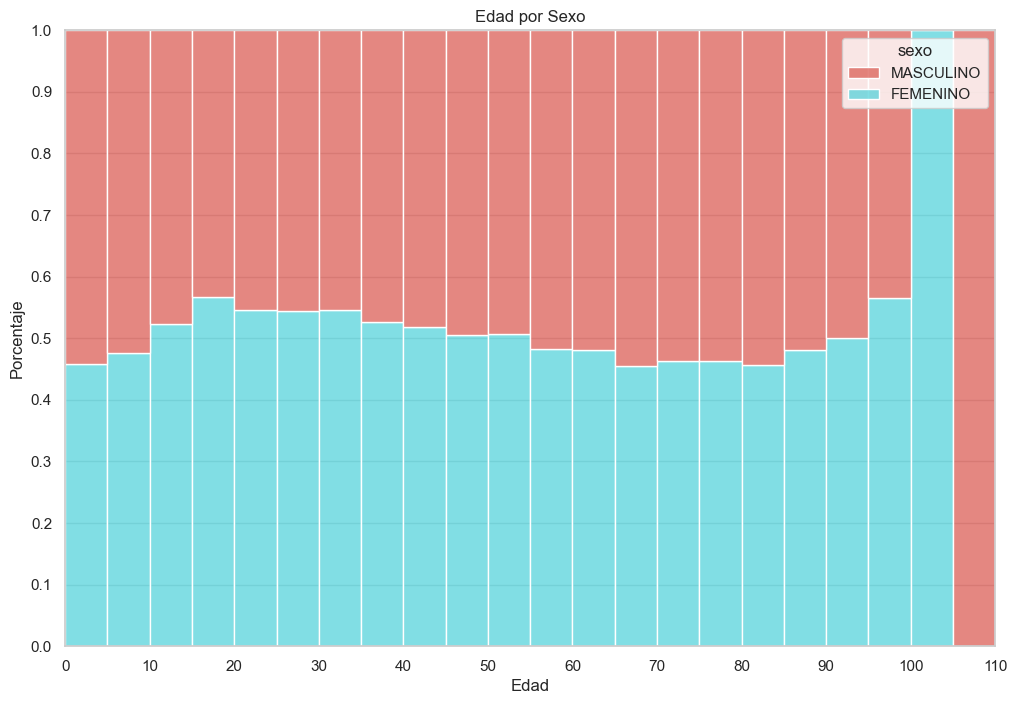

In [265]:
# Calcular el número de bins basado en el ancho del bin
num_bins = int(np.ceil((bin_range[1] - bin_range[0]) / bin_width))

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="edad", hue="sexo", palette="hls", multiple="fill",
             bins=num_bins, binrange=bin_range)

plt.title("Edad por Sexo")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 115, 10))
plt.xlabel("Edad")
plt.ylabel("Porcentaje")
plt.show()

In [266]:
sintomas_cols = df.columns[29:43].append(df.columns[44:49])
sintomas_counts = df[sintomas_cols].sum()
sintomas_counts = sintomas_counts.sort_values(ascending=False)
sintomas_counts

tos               32152
malestar          26849
garganta          26568
cefalea           25729
fiebre            21477
congestion        13879
respiratoria       9091
muscular           7007
diarrea            6816
pecho              5382
nauseas            5222
abdominal          2202
articulaciones     1721
disnea             1342
irritabilidad      1118
exudado             604
conjuntival         290
convulsion           26
coma                  6
dtype: int64

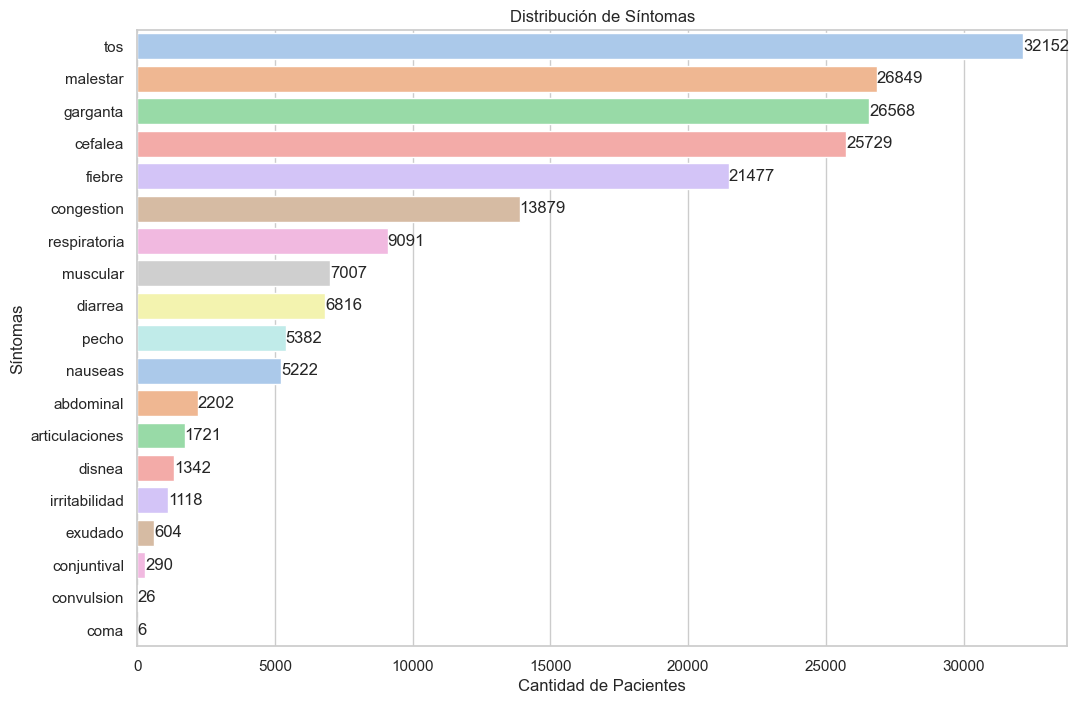

In [267]:
plt.figure(figsize=(12, 8))
sns.barplot(x=sintomas_counts.values, y=sintomas_counts.index, hue=sintomas_counts.index, palette='pastel', orient='h', dodge=False)

# Adding total count at the end of each bar
for i, count in enumerate(sintomas_counts.values):
    plt.text(count, i, str(count), ha='left', va='center')

plt.title('Distribución de Síntomas')
plt.xlabel('Cantidad de Pacientes')
plt.ylabel('Síntomas')
plt.show()

In [268]:
# Seleccionar las columnas de síntomas
sintomas_cols = df.columns[29:43].append(df.columns[44:49])

# Calcular la cantidad de síntomas por sexo
sintomas_por_sexo = df.groupby('sexo')[sintomas_cols].sum().reset_index()

# Convertir los datos al formato para la tabla
sintomas_por_sexo_melted = sintomas_por_sexo.melt(id_vars=['sexo'], var_name='Síntoma', value_name='Cantidad')

sintomas_por_sexo_melted

,sexo,Síntoma,Cantidad
0,FEMENINO,fiebre,10379
1,MASCULINO,fiebre,11098
2,FEMENINO,malestar,13737
3,MASCULINO,malestar,13112
4,FEMENINO,tos,15872
5,MASCULINO,tos,16280
6,FEMENINO,garganta,13826
7,MASCULINO,garganta,12742
8,FEMENINO,congestion,7245
9,MASCULINO,congestion,6634


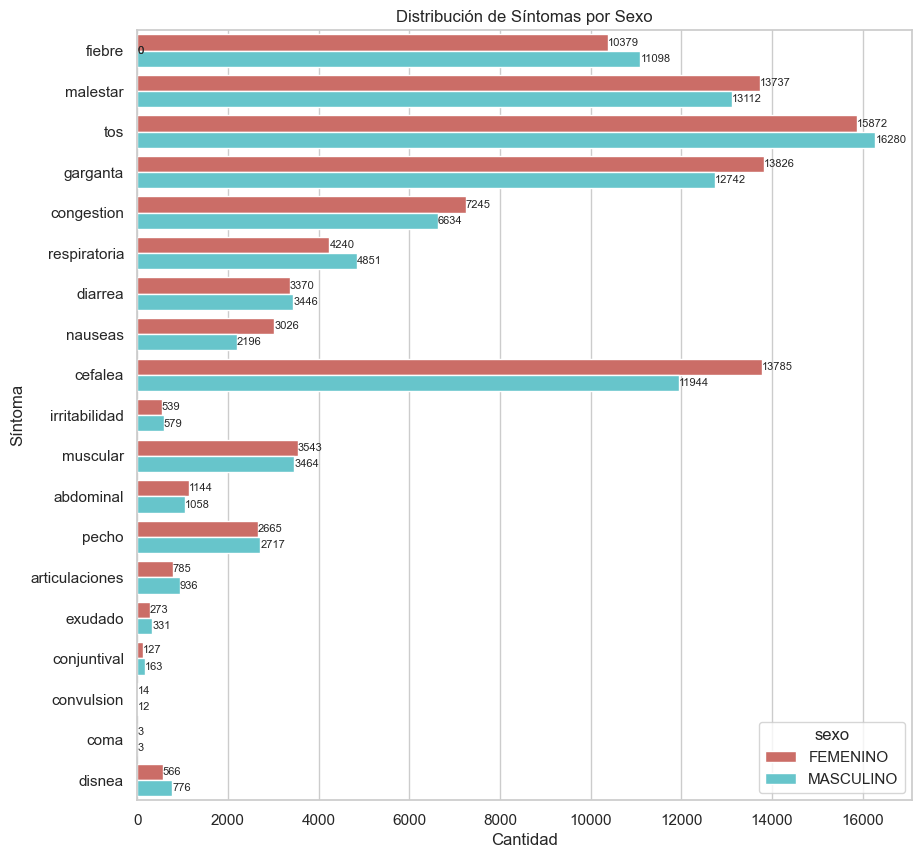

In [269]:
# Tu código para crear el gráfico de barras
plt.figure(figsize=(10, 10))
ax = sns.barplot(data=sintomas_por_sexo_melted, x='Cantidad', y='Síntoma', hue='sexo', palette='hls')

plt.title('Distribución de Síntomas por Sexo')
plt.xlabel('Cantidad')
plt.ylabel('Síntoma')

# Agregar valores al final de las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(width)}', (x + width, y + height / 2), ha='left', va='center', fontsize=8)

plt.show()s

## Análisis 2: Incidencia Geográfica y Temporal

In [270]:
conteo_provincia_sexo_ord = df.groupby(['provincia_residencia', 'sexo']).size().sort_values(ascending=False).reset_index(name='Cantidad')
conteo_provincia_sexo_ord.columns = ['Provincia', 'Sexo', 'Cantidad']
conteo_provincia_sexo_ord

,Provincia,Sexo,Cantidad
0,PUNO,FEMENINO,21144
1,PUNO,MASCULINO,17831
2,SAN ROMAN,MASCULINO,11509
3,SAN ROMAN,FEMENINO,11123
4,CHUCUITO,FEMENINO,3116
5,CHUCUITO,MASCULINO,3065
6,AZANGARO,FEMENINO,2778
7,AZANGARO,MASCULINO,2418
8,LAMPA,FEMENINO,2046
9,LAMPA,MASCULINO,1869


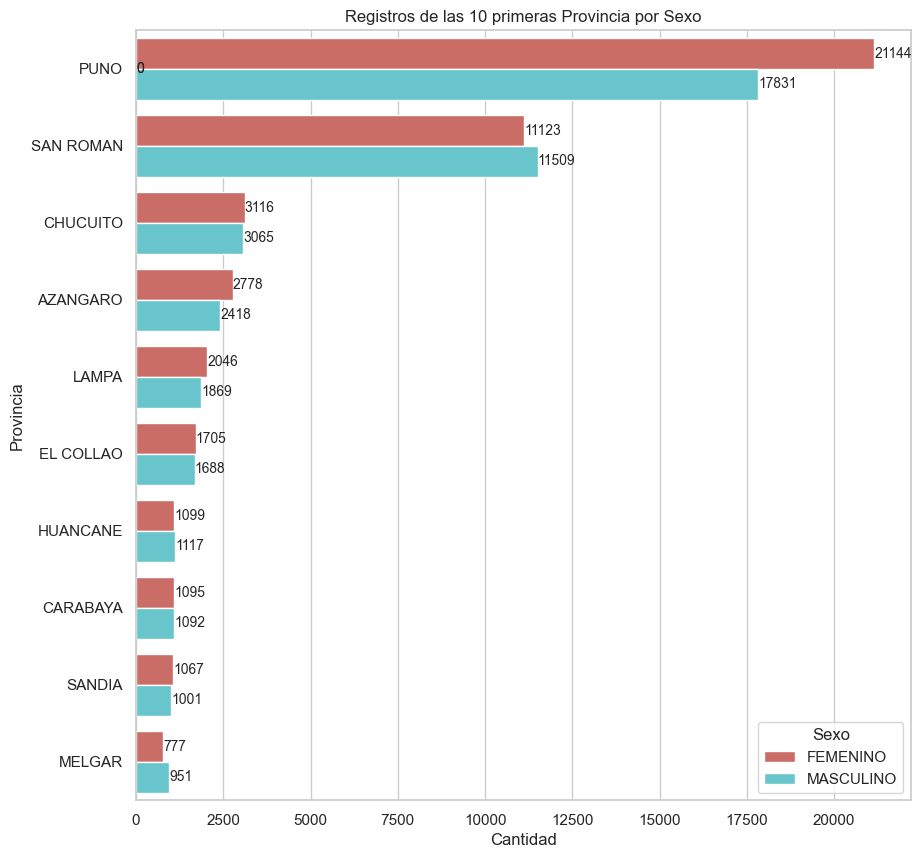

In [271]:
plt.figure(figsize=(10, 10))

ax = sns.barplot(data = conteo_provincia_sexo_ord.head(20), x = "Cantidad", y = "Provincia", hue = "Sexo", palette = "hls", orient = "h")

plt.title("Registros de las 10 primeras Provincia por Sexo")
plt.xlabel("Cantidad")
plt.ylabel("Provincia")

# Agregar valores al final de las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(width)}', (x + width, y + height / 2), ha='left', va='center', fontsize=10)

plt.show()

In [272]:
conteo_provincia_anio_ord = df.groupby(['provincia_residencia', 'ano']).size().sort_values(ascending=False).reset_index(name='Cantidad')
conteo_provincia_anio_ord.columns = ['Provincia', 'Anio', 'Cantidad']
conteo_provincia_anio_ord

,Provincia,Anio,Cantidad
0,PUNO,2020,23490
1,SAN ROMAN,2020,16936
2,PUNO,2021,15484
3,SAN ROMAN,2021,5696
4,CHUCUITO,2020,4581
5,AZANGARO,2020,3781
6,LAMPA,2020,2683
7,EL COLLAO,2020,2671
8,SANDIA,2020,1610
9,CHUCUITO,2021,1600


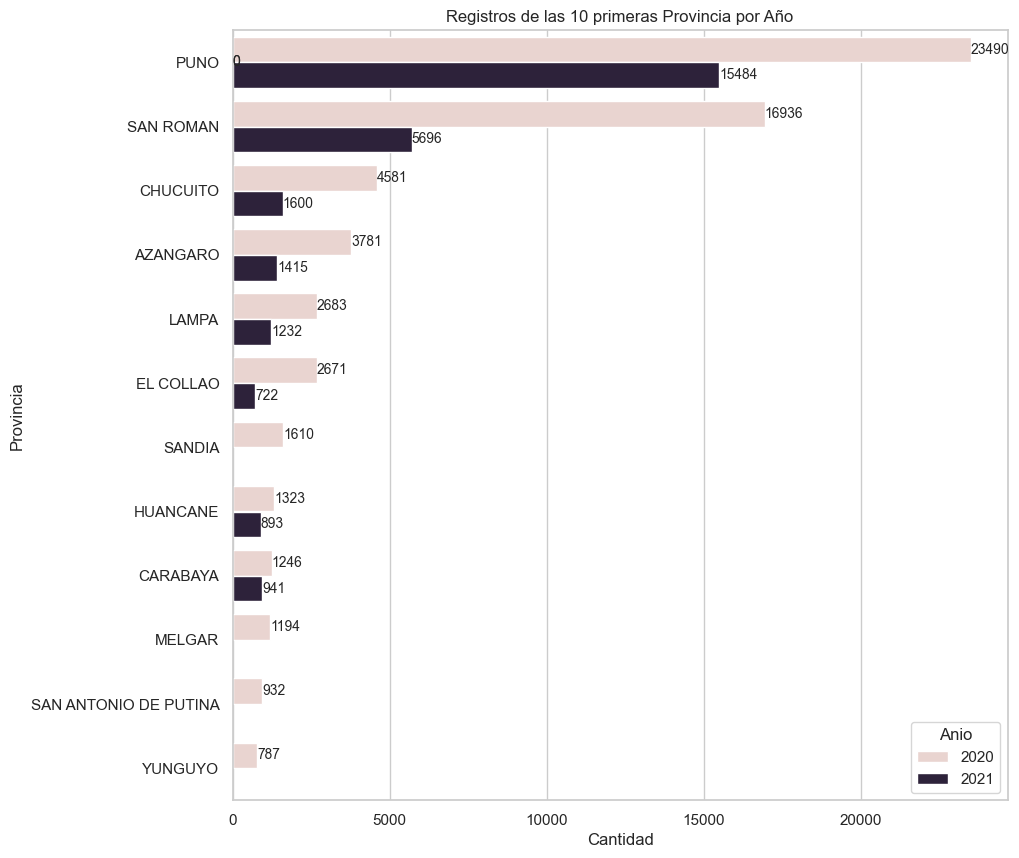

In [273]:
plt.figure(figsize=(10, 10))

sns.color_palette("Set2")
ax = sns.barplot(data = conteo_provincia_anio_ord.head(20), x = "Cantidad", y = "Provincia", hue = "Anio", orient = "h")

plt.title("Registros de las 10 primeras Provincia por Año")
plt.xlabel("Cantidad")
plt.ylabel("Provincia")

# Agregar valores al final de las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(width)}', (x + width, y + height / 2), ha='left', va='center', fontsize=10)

plt.show()

## Análisis 3: Factores de Riesgo y Contacto

In [274]:
# Obtener los tres primeros valores de la clasificación
clasificacion_counts = df['clasificacion'].value_counts()

# Crear un DataFrame con los valores y las etiquetas
df_clasificacion = pd.DataFrame({'Clasificación': clasificacion_counts.index, 'Cantidad': clasificacion_counts.values})

df_clasificacion

,Clasificación,Cantidad
0,CONFIRMADO,50205
1,DESCARTADO,33513
2,SOSPECHOSO,9017
3,PROBABLE,78
4,SIN REGISTRO,4


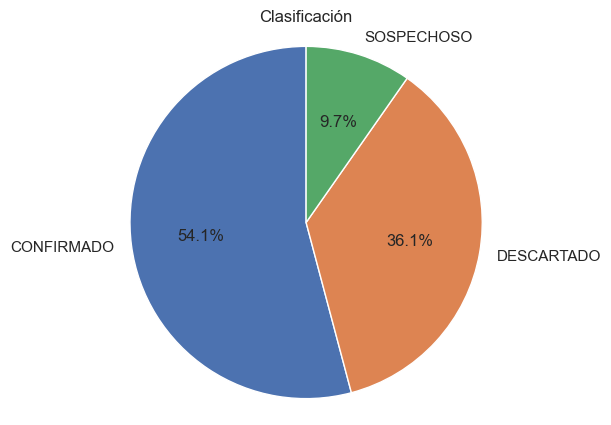

In [275]:
# Obtener los tres primeros valores de la clasificación
clasificacion_counts = df['clasificacion'].value_counts().head(3)

# Graficar
plt.figure(figsize=(5, 5))
plt.pie(clasificacion_counts, labels=clasificacion_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Clasificación')
plt.axis('equal')
plt.show()

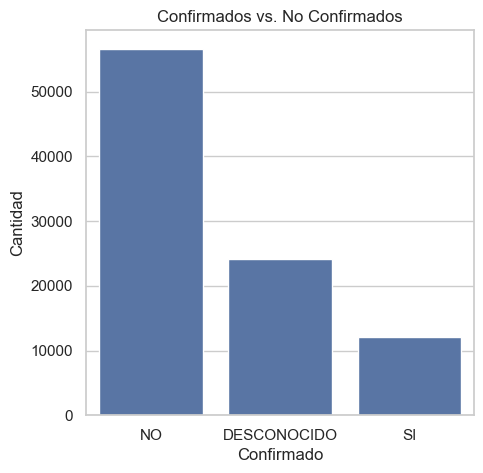

In [276]:
confirmados_counts = df['confirmado_14'].value_counts()
plt.figure(figsize=(5, 5))
sns.barplot(x=confirmados_counts.index, y=confirmados_counts.values)
plt.title('Confirmados vs. No Confirmados')
plt.xlabel('Confirmado')
plt.ylabel('Cantidad')
plt.show()

In [277]:
conteo_provincia_anio_ord = df[df['clasificacion'].isin(['CONFIRMADO', 'SOSPECHOSO', 'DESCARTADO'])].groupby(['edad', 'clasificacion']).size().reset_index(name='Cantidad')
conteo_provincia_anio_ord.columns = ['Edad', 'Clasificacion', 'Cantidad']
conteo_provincia_anio_ord = conteo_provincia_anio_ord.sort_values(by='Edad')
conteo_provincia_anio_ord

,Edad,Clasificacion,Cantidad
0,0,CONFIRMADO,25
1,0,DESCARTADO,3
2,0,SOSPECHOSO,9
3,1,CONFIRMADO,283
4,1,DESCARTADO,158
5,1,SOSPECHOSO,99
6,2,CONFIRMADO,101
7,2,DESCARTADO,119
8,2,SOSPECHOSO,62
11,3,SOSPECHOSO,53


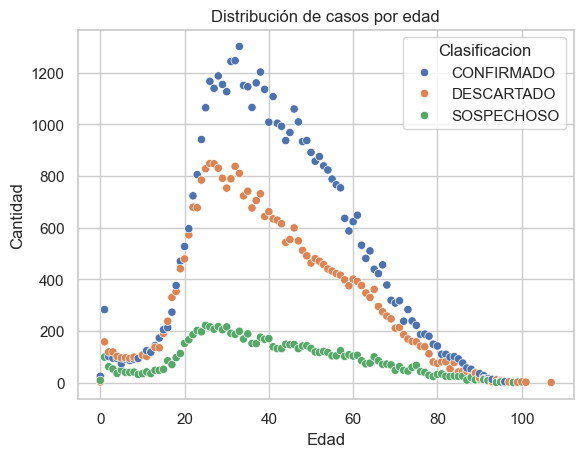

In [278]:
sns.scatterplot(data = conteo_provincia_anio_ord, x = "Edad", y = "Cantidad", hue = "Clasificacion")
plt.title("Distribución de casos por edad")
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()